In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have two datasets which are train and test datasets. We'll combine these datasets into one at cleaning and exploration stages. Then we will split the datasets into train and test again.

To indicate the source of datasets, we will add a column indicating "train" or "test".

In [3]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

#shape of train and test
print('train: ',train.shape,'test: ',test.shape)

train:  (8693, 14) test:  (4277, 13)


The number of columns are not equal. Take a look into the column names.

In [4]:
test_col = test.columns
for col in train:
    if col in test_col:
        pass
    else:
        print('missing col:',col)

missing col: Transported


The missing column: "Transported" is the target variable of the dataset. Test dataset "Transported" should be predicted. Hence, we can combine the dataset now without including this column.

In [5]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
#check na
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Data Cleaning
Filling missing values in both categorical and numerical variables.

In [8]:
a = train.duplicated().sum()
b = test.duplicated().sum()
print(a, b)

0 0


Let's explore more to understand the dataset. [EDA]

In [9]:
#Fill missing values 
def filling_missing_value(df):
    for col in df:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df
train = filling_missing_value(train)
test = filling_missing_value(test)

In [10]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [11]:
#change data type of 'Transported' in train set.
train['output'] = pd.Categorical(train['Transported']).codes
train = train.drop('Transported', axis = 1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,output
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [12]:
train['set'] = 'train'
test['set'] = 'test'
df = pd.concat([train,test])
df.head()
#df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,output,set
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train


Split cabin column into three columns: deck/number/side

In [13]:
# Split "Cabin" to three columns: Deck, Num, Size
df['Deck'] = df['Cabin'].str.split('/',2).str[0]
df['Num'] = df['Cabin'].str.split('/',2).str[1]
df['Size'] = df['Cabin'].str.split('/',2).str[2]

In [14]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,output,set,Deck,Num,Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train,F,1,S


In [15]:
df = df.drop('Cabin', axis = 1)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,output,set,Deck,Num,Size
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,train,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,train,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,train,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,train,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,train,F,1,S


In [16]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [17]:
# label for other categorical columns
cat_col = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', 'Deck', 'Num', 'Size']
new_col = ['Cryo_Sleep','vip','Home_planet', 'destination','deck','num','size']

for col in df:
    if col in cat_col:
        ind = cat_col.index(col)
        df[new_col[ind]] = pd.Categorical(df[col]).codes


In [18]:
#df = df.drop('PassengerId', axis = 1)
df = df.drop('Name', axis = 1)

In [19]:
for col in cat_col:
    df = df.drop(col,axis = 1)

In [20]:
df.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,output,set,Home_planet,Cryo_Sleep,destination,vip,deck,num,size
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,train,1,0,2,0,1,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,train,0,0,2,0,5,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,train,1,0,2,1,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,train,1,0,2,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,train,0,0,2,0,5,1,1


In [21]:
traindf = df[df['set']=='train']
testdf = df[df['set']=='test']

In [22]:
traindf = traindf.drop('set',axis = 1)
testdf = testdf.drop('set',axis = 1)
testdf = testdf.drop('output',axis = 1)

In [23]:
traindf.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,output,Home_planet,Cryo_Sleep,destination,vip,deck,num,size
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,0,1,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,1.0,0,0,2,0,5,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1,0,2,1,0,0,1
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,1,0,2,0,0,0,1
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,1.0,0,0,2,0,5,1,1


In [24]:
#testdf = df.drop('set',axis = 1)
testdf.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Home_planet,Cryo_Sleep,destination,vip,deck,num,size
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,1,2,0,6,1117,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,2,0,5,1228,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,2,0,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,2,0,2,1,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,2,0,5,1339,1


# Data Modelling
I) Set Training and Testing Data

II) Models used:
1. Decision Tree
2. Random Forest Tree
3. Naive Bayes
4. K-Means

In [25]:
target = traindf['output']
feature = traindf.drop('output', axis = 1)

In [26]:
# Set Training and Testing Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (6954, 14)
Shape of testing feature: (1739, 14)
Shape of training label: (6954,)
Shape of training label: (1739,)


We will define a function called: evaluate_model, to evaluate the performance of our models.

In [27]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [28]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.750431282346176
Precision: 0.7532894736842105
Recall: 0.7667410714285714
F1 Score: 0.7599557522123894
Cohens Kappa Score: 0.5001178957854244
Area Under Curve: 0.7499185784189122
Confusion Matrix:
 [[618 225]
 [209 687]]


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.8073605520414031
Precision: 0.8408262454434994
Recall: 0.7723214285714286
F1 Score: 0.8051192553810356
Cohens Kappa Score: 0.6153480464171934
Area Under Curve: 0.8878513705304185
Confusion Matrix:
 [[712 131]
 [204 692]]


In [30]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6900517538815412
Precision: 0.6341096919609316
Recall: 0.9419642857142857
F1 Score: 0.7579703637180062
Cohens Kappa Score: 0.369911017806522
Area Under Curve: 0.8100321979325539
Confusion Matrix:
 [[356 487]
 [ 52 844]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.6152961472110409
Precision: 0.607176581680831
Recall: 0.7176339285714286
F1 Score: 0.6578005115089515
Cohens Kappa Score: 0.22544751490828663
Area Under Curve: 0.6619177364006101
Confusion Matrix:
 [[427 416]
 [253 643]]


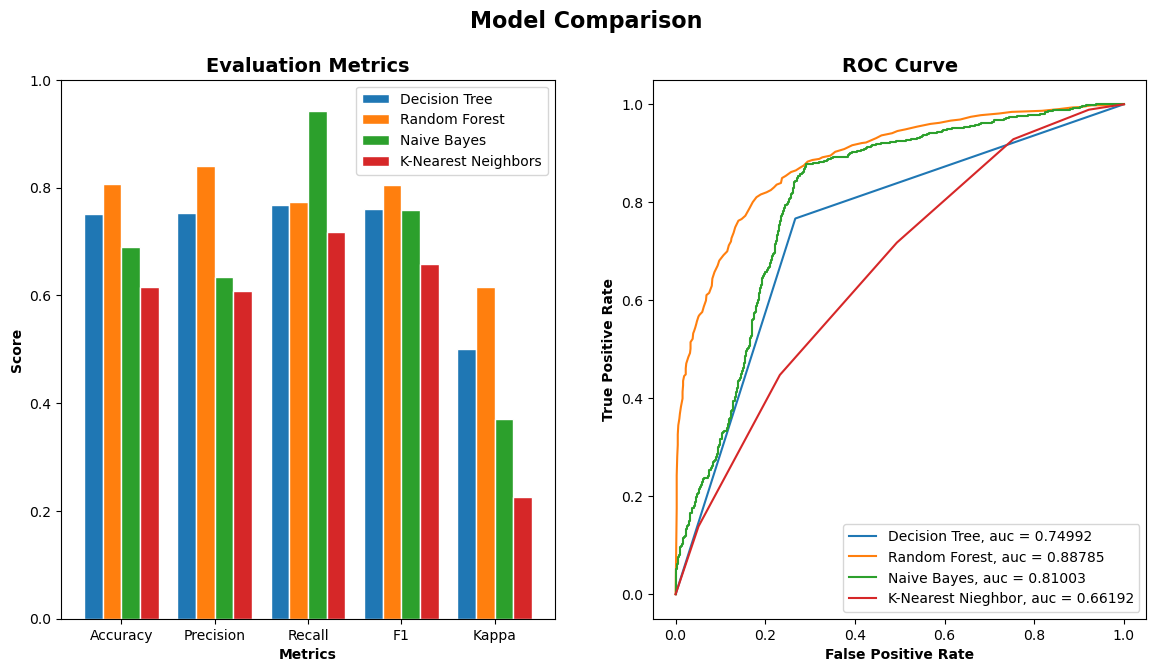

In [32]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Prediction of test file

In [33]:
testdf['Transported'] = rf.predict(testdf)

In [34]:
testdf['Transported'] = testdf['Transported'].apply(lambda x: 'False' if x==0 else 'True')
testdf.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Home_planet,Cryo_Sleep,destination,vip,deck,num,size,Transported
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,0,1,2,0,6,1117,1,True
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,0,0,2,0,5,1228,1,False
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,2,0,1,True
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,1,0,2,0,2,1,1,True
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,0,0,2,0,5,1339,1,False


In [35]:
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = testdf['Transported']
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
